In [176]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import pandas_ta as ta ## Technical Analysis Indicators
import yfinance as yf
from pytrends.request import TrendReq
import time

data = yf.download(tickers = 'BTC-USD', start = '2015-01-01',end = '2021-01-01')
data.to_csv('modules/data/currencies/bitcoin/btc_dates_daily.csv')
data.head(10)
data.shape



[*********************100%%**********************]  1 of 1 completed


(2192, 6)

In [177]:
import pandas as pd

column_names_monthly = ['Month', 'monthVol']
column_names_daily = ['Day', 'dayVol']

dfM = pd.read_csv('modules/data/currencies/bitcoin/gTrends/monthly/multiTimeline-78.csv', names=column_names_monthly)

# Define an initially empty DataFrame to accumulate results
combined_df = pd.DataFrame(columns=column_names_daily)

# Define the range for iteration (4 to 78)
for i in range(0, 72):
    dfD = pd.read_csv('modules/data/currencies/bitcoin/gTrends/Months/{}.csv'.format(i+1), names=column_names_daily, skiprows=2)
    monthlyVolume = pd.to_numeric(dfM.at[i+2, 'monthVol'], errors='coerce')
    dfD_copy = dfD.copy()
    dfD_copy['dayVol'] = pd.to_numeric(dfD_copy['dayVol'], errors='coerce')
    dfD_copy['dayVol'] *= monthlyVolume
    combined_df = pd.concat([combined_df, dfD_copy], ignore_index=True)
    print(monthlyVolume)
    
# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)


4
3
3
2
2
2
4
3
2
3
3
3
3
3
3
3
3
4
3
3
3
4
4
4
6
5
6
5
11
11
12
20
25
28
47
100
52
41
24
19
14
11
10
11
11
10
14
14
12
12
12
16
20
24
23
22
16
17
13
11
16
18
24
21
25
17
18
20
14
16
29
34


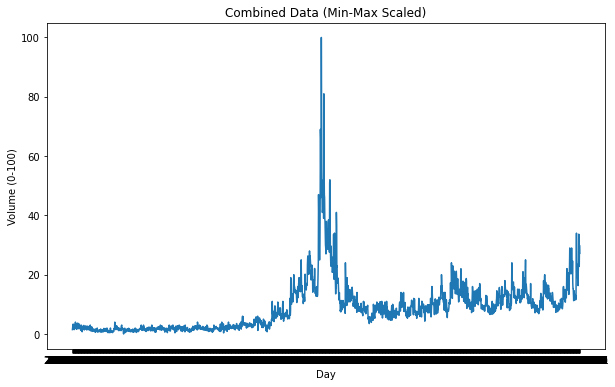

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

column_names = ['Day', 'volume']
dfM = pd.read_csv('modules/data/currencies/bitcoin/combined_data.csv', names=column_names)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

# Fit and transform the 'volume' column
dfM['volume'] = scaler.fit_transform(dfM[['volume']])

# Plot the min-max scaled 'volume' values in the DataFrame
def plot_dataframe(data_frame):
    plt.figure(figsize=(10, 6))
    plt.plot(data_frame['Day'], data_frame['volume'])
    plt.title('Combined Data (Min-Max Scaled)')
    plt.xlabel('Day')
    plt.ylabel('Volume (0-100)')
    plt.show()

plot_dataframe(dfM)


In [179]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [180]:
print(dfM.shape)
print(data.shape)

(2192, 2)
(2192, 6)


In [181]:
gTrends = dfM['volume'].tolist()
print(gTrends)


[1.48, 2.4, 3.0, 3.3200000000000003, 2.08, 2.04, 1.8, 3.2, 1.48, 2.84, 2.48, 2.0, 2.8000000000000003, 4.0, 2.0, 2.24, 3.48, 1.6400000000000001, 2.08, 1.76, 3.4, 2.4, 2.2, 3.68, 1.72, 2.68, 2.92, 2.16, 2.2800000000000002, 3.08, 3.3200000000000003, 2.5500000000000003, 1.83, 1.98, 2.4, 1.53, 1.23, 2.37, 3.0, 1.62, 2.22, 2.34, 0.75, 2.61, 2.52, 2.2800000000000002, 1.86, 1.98, 1.77, 2.88, 1.86, 1.35, 2.04, 2.37, 2.0100000000000002, 2.52, 1.62, 2.0100000000000002, 2.73, 1.95, 2.07, 2.07, 1.35, 1.95, 2.5500000000000003, 2.34, 2.58, 2.04, 2.49, 1.44, 2.0100000000000002, 1.77, 1.92, 2.5500000000000003, 1.44, 2.07, 1.5, 3.0, 1.08, 2.13, 1.23, 2.13, 2.19, 2.43, 2.25, 0.87, 1.92, 1.3800000000000001, 1.77, 1.44, 1.3, 1.06, 1.22, 1.06, 1.4000000000000001, 0.96, 0.98, 1.3800000000000001, 1.68, 0.54, 1.54, 1.0, 1.48, 1.06, 1.24, 1.52, 0.98, 2.0, 0.66, 1.1400000000000001, 1.18, 0.84, 0.72, 1.16, 1.3, 1.36, 1.22, 1.18, 0.84, 1.3800000000000001, 0.72, 1.42, 1.68, 1.28, 0.64, 0.86, 0.96, 0.8, 0.72, 1.42, 

In [182]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15) ## Relative Strength Index
data['EMAF']=ta.ema(data.Close, length=20) ## Exponential Moving Average Fast
data['EMAM']=ta.ema(data.Close, length=100) ## Exponential Moving Average Medium
data['EMAS']=ta.ema(data.Close, length=150) ## Exponential Moving Average Slow

data['gTrends'] = gTrends ## Google Trends


data['Target'] = data['Adj Close']-data.Open ## Target is the difference between the opening price and the future closing price
data['Target'] = data['Target'].shift(-1) ## Shift the target by one day


data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))] ## TargetClass is 1 if the price goes up and 0 if it goes down
data['TargetNextClose'] = data['Adj Close'].shift(-1) ## TargetNextClose is the future closing price



data.reset_index(inplace = True) ## Reset the index
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [183]:
data.dropna(inplace=True) ## Drop the NaN values

In [184]:
data_set = data.iloc[:, 0:12]#.values
pd.set_option('display.max_columns', None)

data_set.head(-20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,gTrends,Target,TargetClass,TargetNextClose
149,237.091995,237.093002,232.046005,233.345001,44.997251,236.674144,240.674675,245.268894,2.00,-2.944992,0,230.190002
150,233.134995,233.251999,229.542007,230.190002,41.186285,236.056607,240.467058,245.069174,1.56,-7.307007,0,222.925995
151,230.233002,231.712997,221.296005,222.925995,34.068533,234.806073,240.119710,244.775886,1.42,2.908997,1,225.802994
152,222.893997,226.416000,222.419006,225.802994,38.573317,233.948637,239.836210,244.524590,1.02,0.138000,1,225.873993
153,225.735992,227.404007,223.929993,225.873993,38.684089,233.179623,239.559731,244.277562,1.04,-1.447998,0,224.324005
...,...,...,...,...,...,...,...,...,...,...,...,...
2166,19154.179688,19390.500000,18897.894531,19345.121094,63.217136,18211.330935,14389.646971,13261.302751,14.62,-151.498047,0,19191.630859
2167,19343.128906,19411.828125,18931.142578,19191.630859,61.791170,18304.692832,14484.735761,13339.850143,11.56,-870.384766,0,18321.144531
2168,19191.529297,19283.478516,18269.945312,18321.144531,54.342808,18306.259661,14560.704251,13405.827552,13.60,233.031250,1,18553.916016
2169,18320.884766,18626.292969,17935.546875,18553.916016,55.866963,18329.845980,14639.777752,13474.014154,12.24,-288.306641,0,18264.992188


In [185]:
from sklearn.preprocessing import MinMaxScaler ## Scale the data
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


sc = MinMaxScaler(feature_range=(0,1)) ## Scale the data between 0 and 1
data_set_scaled = sc.fit_transform(data_set) ## Fit and transform the data
print(data_set_scaled) ## Print the scaled data

[[9.95358391e-04 3.96140978e-04 1.19581659e-03 ... 4.47033443e-01
  0.00000000e+00 6.84062830e-04]
 [8.49612625e-04 2.62364140e-04 1.10362405e-03 ... 4.46370163e-01
  0.00000000e+00 4.31763478e-04]
 [7.42725316e-04 2.08762847e-04 8.00021562e-04 ... 4.47923590e-01
  1.00000000e+00 5.31689717e-04]
 ...
 [9.60248003e-01 9.46063396e-01 9.57568960e-01 ... 4.90152893e-01
  1.00000000e+00 9.43063098e-01]
 [9.89750310e-01 9.45422876e-01 9.49456385e-01 ... 6.72658712e-01
  1.00000000e+00 9.94416091e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.71832845e-01
  1.00000000e+00 1.00000000e+00]]


In [186]:
# multiple feature from data provided to the model
X = []

backcandles = 30 ## Number of previous candles(days) to consider
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2042
[[[9.95358391e-04 3.96140978e-04 1.19581659e-03 ... 2.87270963e-04
   1.92212322e-04 2.07835055e-04]
  [8.49612625e-04 2.62364140e-04 1.10362405e-03 ... 2.61173918e-04
   1.80263313e-04 1.95035604e-04]
  [7.42725316e-04 2.08762847e-04 8.00021562e-04 ... 2.08326499e-04
   1.60272386e-04 1.76239756e-04]
  ...
  [1.19837881e-03 6.27959928e-04 1.54584625e-03 ... 4.38071177e-04
   9.16918162e-05 2.99699904e-05]
  [1.23318511e-03 8.92309537e-04 1.60343022e-03 ... 4.81327001e-04
   1.05438338e-04 3.71820840e-05]
  [1.50596596e-03 8.86492898e-04 1.76237419e-03 ... 5.12498227e-04
   1.16657251e-04 4.26188105e-05]]

 [[8.49612625e-04 2.62364140e-04 1.10362405e-03 ... 2.61173918e-04
   1.80263313e-04 1.95035604e-04]
  [7.42725316e-04 2.08762847e-04 8.00021562e-04 ... 2.08326499e-04
   1.60272386e-04 1.76239756e-04]
  [4.72412291e-04 2.42757631e-05 8.41368376e-04 ... 1.72091366e-04
   1.43956132e-04 1.60134950e-04]
  ...
  [1.23318511e-03 8.92309537e-04 1.60343022e-03 ... 4.81327001e-04
   1.

In [187]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

1609
(1609, 30, 8)
(403, 30, 8)
(1609, 1)
(403, 1)
[[0.00182615]
 [0.00167155]
 [0.00156009]
 ...
 [0.24611952]
 [0.24963515]
 [0.23748284]]


In [188]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [189]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1 = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 8)]           0         
                                                                 
 first_layer (LSTM)          (None, 30, 400)           654400    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4498401 (17.16 MB)
Trainable params: 4498401 (17.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [191]:
model1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=15, shuffle=True, validation_split = 0.1, callbacks=[cp1])

Epoch 1/15
108/108 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.0954INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 35s 309ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 2/15
108/108 [==============================] - ETA: 0s - loss: 7.1272e-04 - root_mean_squared_error: 0.0267INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 35s 323ms/step - loss: 7.1272e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 3/15
108/108 [==============================] - ETA: 0s - loss: 5.7521e-04 - root_mean_squared_error: 0.0240INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 34s 316ms/step - loss: 5.7521e-04 - root_mean_squared_error: 0.0240 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 4/15
108/108 [==============================] - ETA: 0s - loss: 5.2900e-04 - root_mean_squared_error: 0.0230INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 33s 307ms/step - loss: 5.2900e-04 - root_mean_squared_error: 0.0230 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 5/15
108/108 [==============================] - 31s 289ms/step - loss: 5.1503e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 6/15
108/108 [==============================] - 31s 287ms/step - loss: 4.0196e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 7/15
108/108 [==============================] - ETA: 0s - loss: 4.5675e-04 - root_mean_squared_error: 0.0214INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 31s 290ms/step - loss: 4.5675e-04 - root_mean_squared_error: 0.0214 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 8/15
108/108 [==============================] - ETA: 0s - loss: 3.7844e-04 - root_mean_squared_error: 0.0195INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 31s 291ms/step - loss: 3.7844e-04 - root_mean_squared_error: 0.0195 - val_loss: 8.9146e-04 - val_root_mean_squared_error: 0.0299
Epoch 9/15
108/108 [==============================] - ETA: 0s - loss: 3.5041e-04 - root_mean_squared_error: 0.0187INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


108/108 [==============================] - 35s 323ms/step - loss: 3.5041e-04 - root_mean_squared_error: 0.0187 - val_loss: 7.8172e-04 - val_root_mean_squared_error: 0.0280
Epoch 10/15
108/108 [==============================] - 28s 263ms/step - loss: 3.3588e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 11/15
108/108 [==============================] - 28s 262ms/step - loss: 3.7710e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 12/15
108/108 [==============================] - 29s 272ms/step - loss: 3.3967e-04 - root_mean_squared_error: 0.0184 - val_loss: 7.9512e-04 - val_root_mean_squared_error: 0.0282
Epoch 13/15
108/108 [==============================] - 34s 314ms/step - loss: 3.3861e-04 - root_mean_squared_error: 0.0184 - val_loss: 7.8485e-04 - val_root_mean_squared_error: 0.0280
Epoch 14/15
108/108 [==============================] - 29s 265ms/step - loss: 2.8826e-04 - root_mean

In [192]:
from keras.models import load_model
model1 = load_model('model1/')

In [193]:
y_pred = model1.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

13/13 [==============================] - 2s 100ms/step
[0.2582571] [0.24089418]
[0.25161415] [0.24340319]
[0.24793519] [0.25428471]
[0.24815363] [0.25190352]
[0.25489074] [0.26225867]
[0.2603692] [0.25560339]
[0.26817912] [0.25055541]
[0.27091208] [0.2470021]
[0.26822442] [0.2469381]
[0.26338243] [0.24457242]


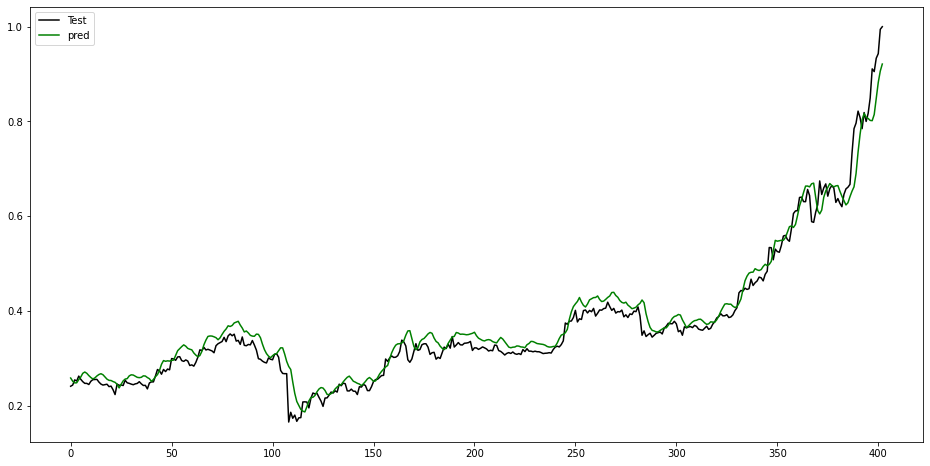

Mean Absolute_error:  20.807478576898575
Mean Squared Error:  0.7817200385034084


In [194]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)





In [195]:
# multiple feature from data provided to the model
X = []

print(data_set_scaled.shape[0])
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2]) 

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2042
[[[9.95358391e-04 3.96140978e-04 1.19581659e-03 ... 1.92212322e-04
   2.07835055e-04 2.00000000e-02]
  [8.49612625e-04 2.62364140e-04 1.10362405e-03 ... 1.80263313e-04
   1.95035604e-04 1.56000000e-02]
  [7.42725316e-04 2.08762847e-04 8.00021562e-04 ... 1.60272386e-04
   1.76239756e-04 1.42000000e-02]
  ...
  [1.19837881e-03 6.27959928e-04 1.54584625e-03 ... 9.16918162e-05
   2.99699904e-05 1.00000000e-02]
  [1.23318511e-03 8.92309537e-04 1.60343022e-03 ... 1.05438338e-04
   3.71820840e-05 8.20000000e-03]
  [1.50596596e-03 8.86492898e-04 1.76237419e-03 ... 1.16657251e-04
   4.26188105e-05 8.40000000e-03]]

 [[8.49612625e-04 2.62364140e-04 1.10362405e-03 ... 1.80263313e-04
   1.95035604e-04 1.56000000e-02]
  [7.42725316e-04 2.08762847e-04 8.00021562e-04 ... 1.60272386e-04
   1.76239756e-04 1.42000000e-02]
  [4.72412291e-04 2.42757631e-05 8.41368376e-04 ... 1.43956132e-04
   1.60134950e-04 1.02000000e-02]
  ...
  [1.23318511e-03 8.92309537e-04 1.60343022e-03 ... 1.05438338e-04
   3.

In [196]:
# split data into train test sets
splitlimit = int(len(X)*0.8) ## Split the data into 80% training and 20% testing
print(splitlimit) ## Print the split limit to check
X_train, X_test = X[:splitlimit], X[splitlimit:] ## Split the data into training and testing
y_train, y_test = y[:splitlimit], y[splitlimit:] ## Split the data into training and testing
print(X_train.shape) ## Print the shape of the training data
print(X_test.shape) ## Print the shape of the testing data
print(y_train.shape) ## Print the shape of the training data
print(y_test.shape) ## Print the shape of the testing data
print(y_train) ## Print the training data

1609
(1609, 30, 9)
(403, 30, 9)
(1609, 1)
(403, 1)
[[0.00182615]
 [0.00167155]
 [0.00156009]
 ...
 [0.24611952]
 [0.24963515]
 [0.23748284]]


In [197]:
lstm_input = Input(shape=(backcandles, 9), name='lstm_input')
# Add the first LSTM layer
lstm1 = LSTM(400, return_sequences=True, name='first_layer')(lstm_input)
# Add a second LSTM layer
lstm2 = LSTM(800, name='third_layer')(lstm1)

# Add a Dense layer
dense_layer = Dense(1, name='dense_layer')(lstm2)
# Create the model
model1_GT = Model(inputs=lstm_input, outputs=dense_layer)
adam = optimizers.Adam()

model1_GT.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 30, 400)           656000    
                                                                 
 third_layer (LSTM)          (None, 800)               3843200   
                                                                 
 dense_layer (Dense)         (None, 1)                 801       
                                                                 
Total params: 4500001 (17.17 MB)
Trainable params: 4500001 (17.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
cp1_GT = ModelCheckpoint('model1GT/', save_best_only=True)
model1_GT.compile(loss=MeanSquaredError(), optimizer=adam, metrics=[RootMeanSquaredError()])


In [199]:
model1_GT.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=15, epochs=14, shuffle=True, validation_split = 0.1, callbacks=[cp1_GT])

Epoch 1/14
108/108 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0870INFO:tensorflow:Assets written to: model1GT/assets


INFO:tensorflow:Assets written to: model1GT/assets


108/108 [==============================] - 37s 324ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 2/14
108/108 [==============================] - 30s 280ms/step - loss: 5.3573e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0576
Epoch 3/14
108/108 [==============================] - ETA: 0s - loss: 6.1548e-04 - root_mean_squared_error: 0.0248INFO:tensorflow:Assets written to: model1GT/assets


INFO:tensorflow:Assets written to: model1GT/assets


108/108 [==============================] - 34s 317ms/step - loss: 6.1548e-04 - root_mean_squared_error: 0.0248 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 4/14
108/108 [==============================] - ETA: 0s - loss: 4.3346e-04 - root_mean_squared_error: 0.0208INFO:tensorflow:Assets written to: model1GT/assets


INFO:tensorflow:Assets written to: model1GT/assets


108/108 [==============================] - 35s 328ms/step - loss: 4.3346e-04 - root_mean_squared_error: 0.0208 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 5/14
108/108 [==============================] - ETA: 0s - loss: 3.6543e-04 - root_mean_squared_error: 0.0191INFO:tensorflow:Assets written to: model1GT/assets


INFO:tensorflow:Assets written to: model1GT/assets


108/108 [==============================] - 37s 346ms/step - loss: 3.6543e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0358
Epoch 6/14
108/108 [==============================] - 37s 347ms/step - loss: 3.6995e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0500
Epoch 7/14
108/108 [==============================] - ETA: 0s - loss: 4.5394e-04 - root_mean_squared_error: 0.0213INFO:tensorflow:Assets written to: model1GT/assets


INFO:tensorflow:Assets written to: model1GT/assets


108/108 [==============================] - 39s 358ms/step - loss: 4.5394e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 8/14
108/108 [==============================] - 36s 332ms/step - loss: 3.7981e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 9/14
108/108 [==============================] - 37s 347ms/step - loss: 3.7454e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 10/14
108/108 [==============================] - 38s 357ms/step - loss: 3.8162e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 11/14
108/108 [==============================] - 34s 313ms/step - loss: 3.1780e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 12/14
108/108 [==============================] - 30s 278ms/step - loss: 2.9994e-04 - root_mean_squared_error

In [200]:
model1_GT = load_model('model1GT/')

In [253]:
y_pred = model1_GT.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

13/13 [==============================] - 2s 121ms/step
[0.2571369] [0.24089418]
[0.25110853] [0.24340319]
[0.24791859] [0.25428471]
[0.24841316] [0.25190352]
[0.25415686] [0.26225867]
[0.25877765] [0.25560339]
[0.2651297] [0.25055541]
[0.26676932] [0.2470021]
[0.26330534] [0.2469381]
[0.2580133] [0.24457242]


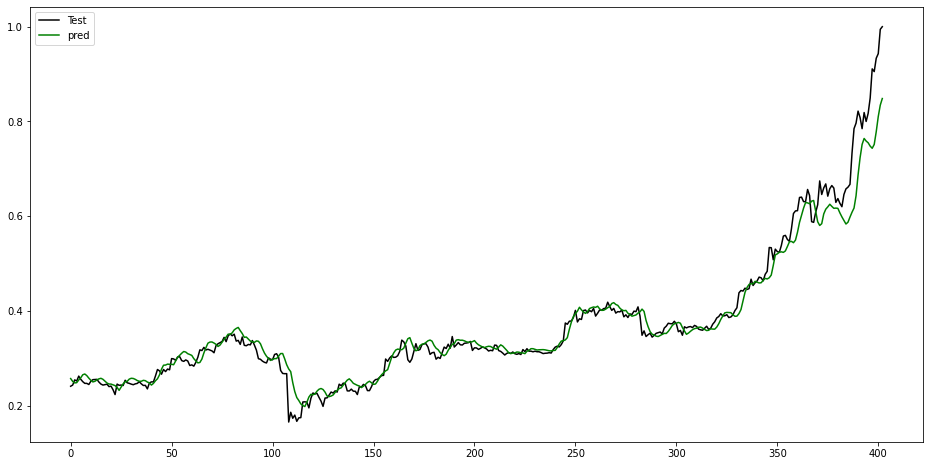

Mean Absolute_error:  18.238183110952377
Mean Squared Error:  1.0649076430127025


In [202]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


mean_absolute_error = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred).numpy())
print("Mean Absolute_error: ",mean_absolute_error*1000)
mean_squared_error = np.mean(tf.keras.metrics.mean_squared_error(y_test, y_pred).numpy())
print("Mean Squared Error: ",mean_squared_error*1000)







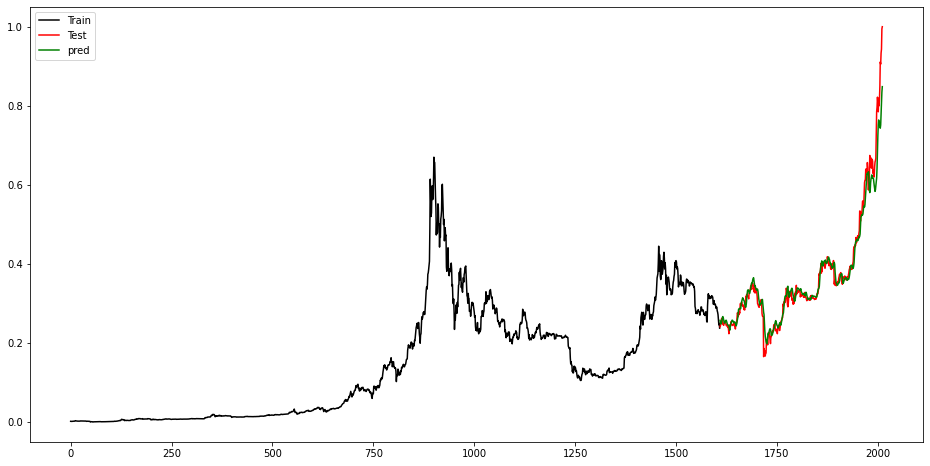

In [255]:
import matplotlib.pyplot as plt

# Your code to create 'y_train', 'y_test', and 'y_pred'...
start_point = len(y_train)  # Adjust 1609 to the desired starting point

plt.figure(figsize=(16, 8))

# Plot the 'Train' segment in red
plt.plot(y_train, color='black', label='Train')

# Plot the 'Test' segment in black
plt.plot(range(start_point, start_point + len(y_pred)), y_test, color='red', label='Test')

# Plot the 'pred' segment starting from 'start_point' in green
plt.plot(range(start_point, start_point + len(y_pred)), y_pred, color='green', label='pred')

plt.legend()
plt.show()
